# Subplots

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

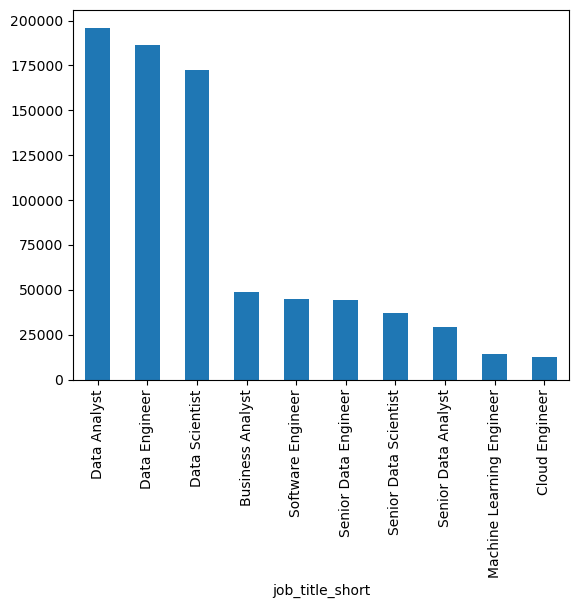

In [5]:
df['job_title_short'].value_counts().plot(kind = 'bar')

<Axes: xlabel='job_title_short'>

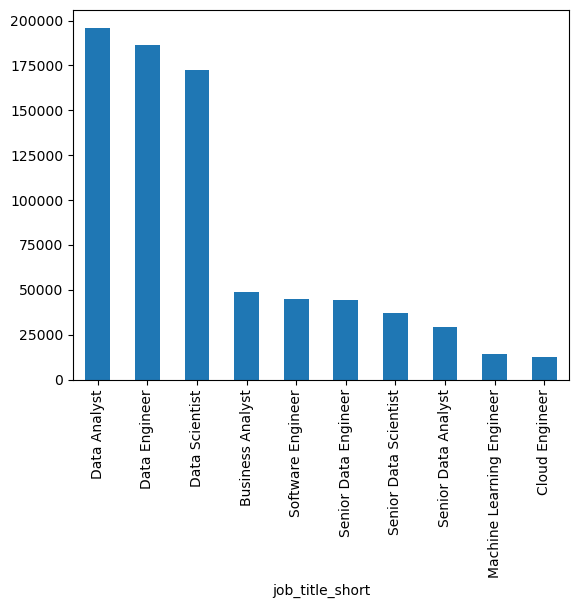

In [7]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax)

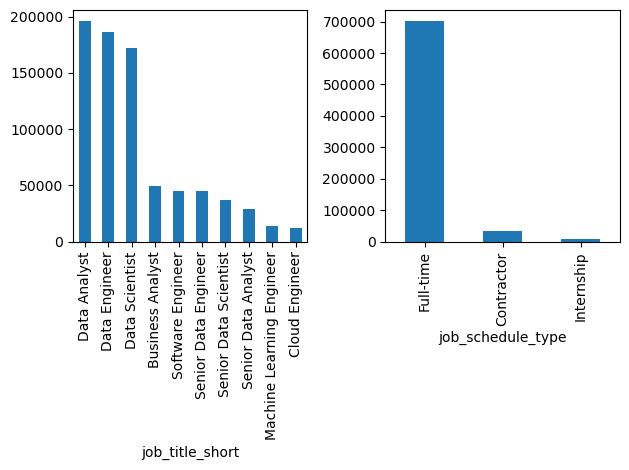

In [9]:
fig,ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind ='bar',ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind ='bar',ax = ax[1])
fig.tight_layout()

### Example - counts of top skills in job postings

In [17]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [18]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

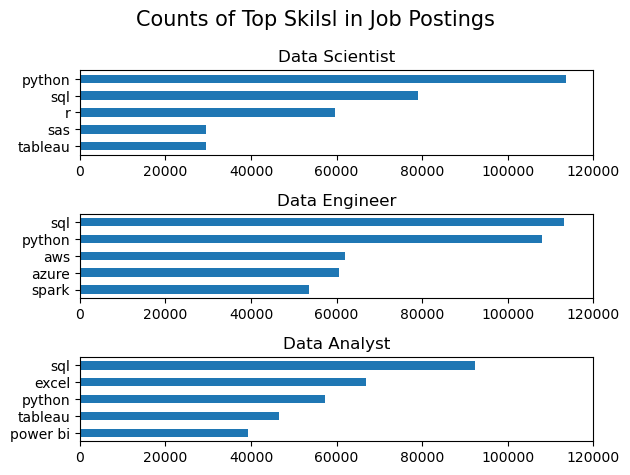

In [33]:
fig,ax = plt.subplots(3,1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot.plot(kind ='barh', x ='job_skills', y = 'skill_count', ax = ax[i], title = title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)


fig.suptitle('Counts of Top Skilsl in Job Postings', fontsize = 15)
fig.tight_layout()

# Pie Plots

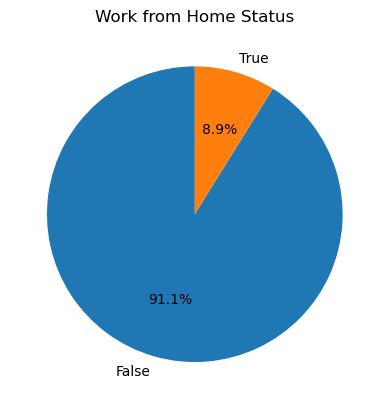

In [44]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90, autopct = '%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel("")
plt.show()

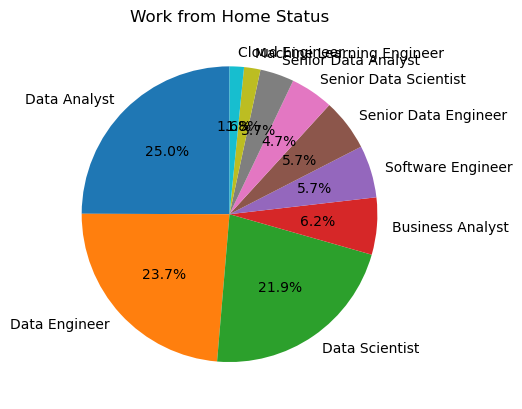

In [46]:
df['job_title_short'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel("")
plt.show()

In [47]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


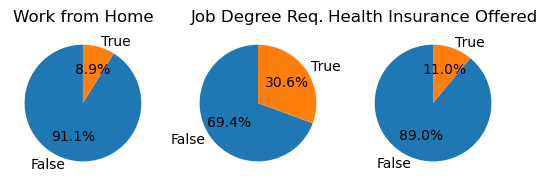

In [54]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct = '%1.1f%%',labels = ['False','True'])
    ax[i].set_title(title)

In [55]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

In [57]:
df_exploded = df_da.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [66]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skills_stats = skill_stats.sort_values('skill_count', ascending = False).head(10)

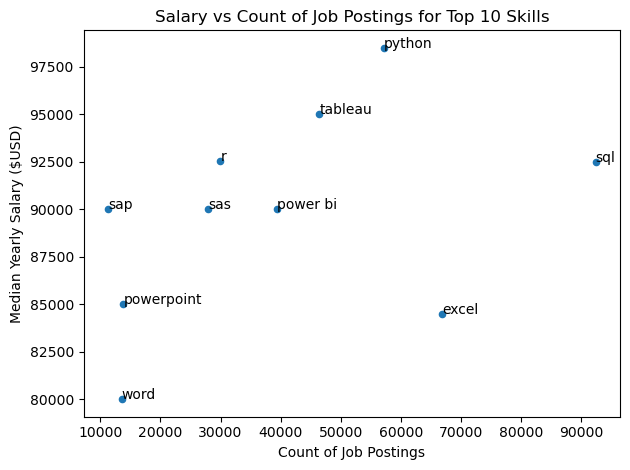

In [71]:
skills_stats.plot(kind = 'scatter', x = 'skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()


for i,txt in enumerate(skills_stats.index): #lista cu denumirile skillurilor din skills_stats
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i],txt)

plt.show()

# Histograms

In [74]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

(0.0, 250000.0)

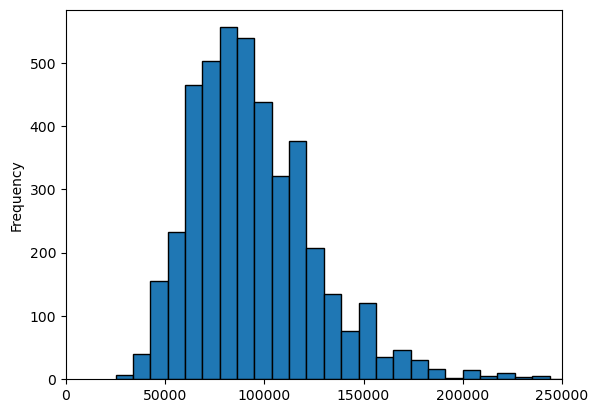

In [89]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us['salary_year_avg'].plot(kind = 'hist',bins = 40 ,edgecolor = 'black')
plt.xlim(0,250000)

# Box Plots

In [91]:
df_da_us = df_da_us.dropna(subset = 'salary_year_avg')
df_da_us['salary_year_avg'].sample(10)

464548    148040.0
222823    114956.5
609463    111175.0
483997     56500.0
139434    156000.0
481094    107500.0
397798    115000.0
477349     67070.0
540234     55000.0
487611    125000.0
Name: salary_year_avg, dtype: float64

<Axes: >

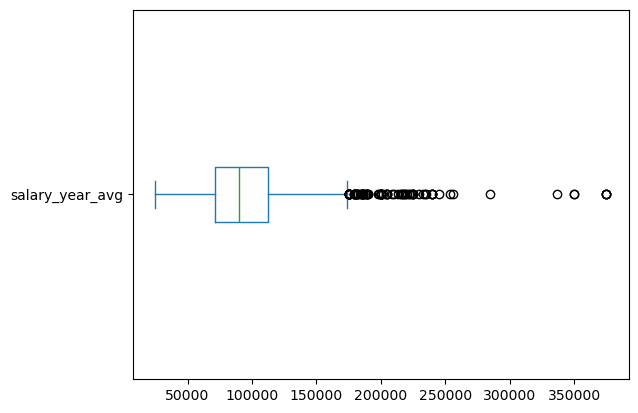

In [93]:
df_da_us['salary_year_avg'].plot(kind = 'box',vert = False)

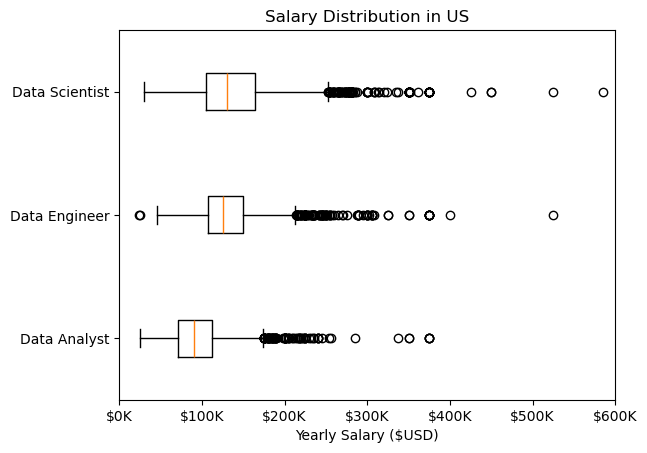

In [110]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==title]['salary_year_avg'] for title in job_titles]

plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
plt.xlim(0,600_000)
plt.show()